In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('train_data_tree.csv')
data.head()


,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [3]:
X = data[['sex', 'exang']] #шаг 1 - отделяем целевую переменную от предсказательных
Y = data.num

In [4]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy') #создаем классификатор

In [5]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

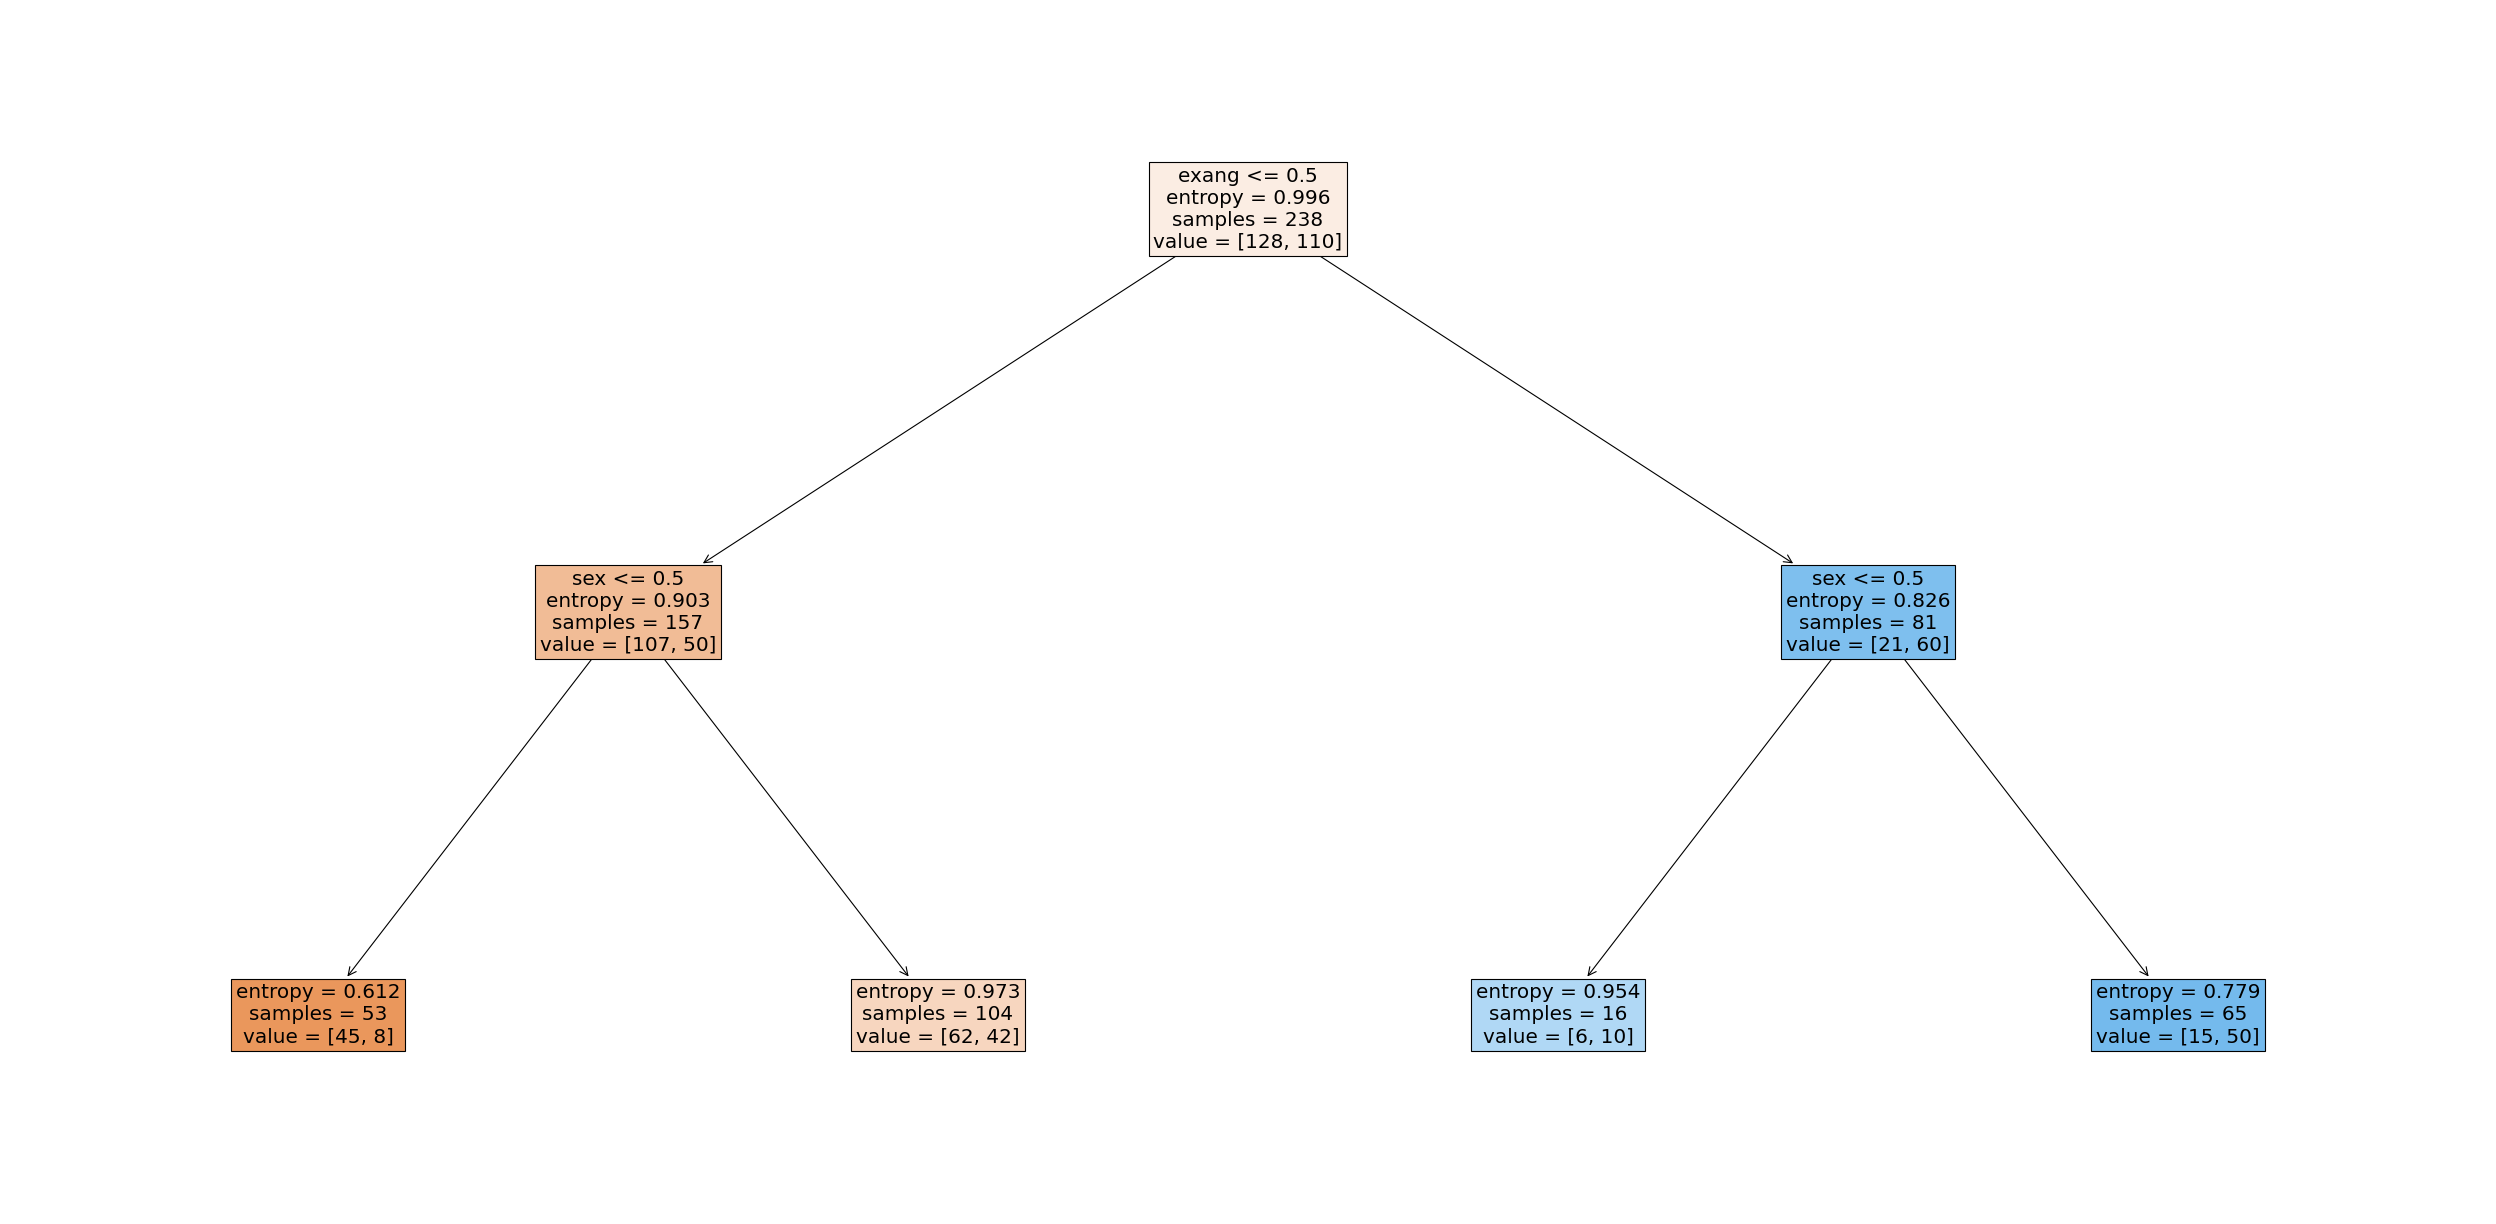

In [8]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=18,filled=True,feature_names=list(X))

In [6]:
l_node = clf.tree_.children_left[0]
r_node = clf.tree_.children_right[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в левом поддереве
e2 = clf.tree_.impurity[r_node] # энтропия в корне левого поддерева
print(n1, e1, n2, e2)

157 0.9027113410339267 81 0.8256265261578954


In [7]:
E = - (128/238) * np.log2(128/238) - (110/238) * np.log2(110/238)

IG = E - ((157 * 0.903 + 81 * 0.826)/(157 + 81))
print(IG)

0.11907587890578986


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
Y = iris.target

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [25]:
dt = tree.DecisionTreeClassifier()

In [26]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [29]:
predicted = dt.predict(X_test)
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [12]:
#GridSearchCv в действии
clf = tree.DecisionTreeClassifier()
params = {'max_depth' : range(1, 10), 'min_samples_split' : range(2, 10), 'min_samples_leaf' : range(1, 10)}
search = GridSearchCV(clf, params)
search.fit(X, Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [15]:
best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=3, min_samples_split=3)